# Entendendo o funcionamento do kNN

## Importação de módulos do Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Definição da matrix X de características (features)

In [2]:
X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

## Definição do vetor y de rótulos (labels)

In [3]:
y = np.array([ 0,  0, 0,  0,  0,  1,  1,  1,  1,  1])

## Gráfico dos dados onde queremos descobrir qual a classe no ponto (4, 1.5)

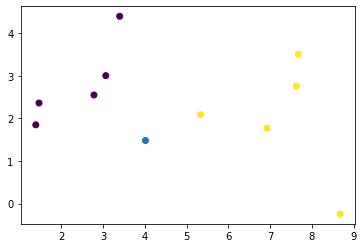

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(4, 1.5);

## Distância euclidiana
A distância euclidiana entre os pontos $ P=(p_{1},p_{2},\dots ,p_{n})$ e $Q=(q_{1},q_{2},\dots ,q_{n})$ em um espaço euclidiano n-dimensional, é definida como:

$$ \sqrt{ (p_{1}-q_{1})^{2} + (p_{2}-q_{2})^{2} + \cdots +(p_{n}-q_{n})^{2} } = \sqrt {\sum _{i=1}^{n}(p_{i}-q_{i})^{2}} $$

In [5]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

## Obtenção dos $k$ vizinhos mais próximos

In [6]:
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

## Classsificação de uma nova linha dado um valor de $k$

In [7]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

### Qual a classe do ponto $(4, 1.5)$ considerando apenas o vizinho mais próximo ($k=1$)?

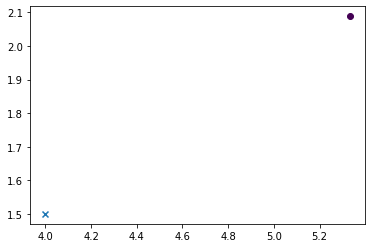

In [8]:
q = np.array([4, 1.5])
idx_sort = get_neighbors(X, q, 1)
plt.scatter(X[idx_sort, 0], X[idx_sort, 1], c=y[idx_sort])
plt.scatter(q[0], q[1], marker='x');

In [9]:
predict_classification(X, y, np.array([4, 1.5]), 1)

idx_sort:[6], output_values:[1], prediction:1


1

#### Resposta: classe 1

### Qual a classe do ponto $(4, 1.5)$ considerando os 3 vizinhos mais próximos ($k=3$)?

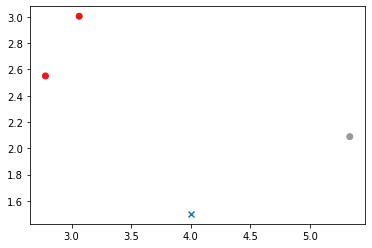

In [10]:
k = 3
q = np.array([4, 1.5])
idx_sort = get_neighbors(X, q, k)
plt.scatter(X[idx_sort, 0], X[idx_sort, 1], c=y[idx_sort], cmap='Set1')
plt.scatter(q[0], q[1], marker='x');

In [11]:
predict_classification(X, y, np.array([4, 1.5]), k)

idx_sort:[6 0 4], output_values:[1 0 0], prediction:0


0

#### Resposta: classe 0